<a href="https://colab.research.google.com/github/PallaviVangari/ClusteringAssignment/blob/main/KMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

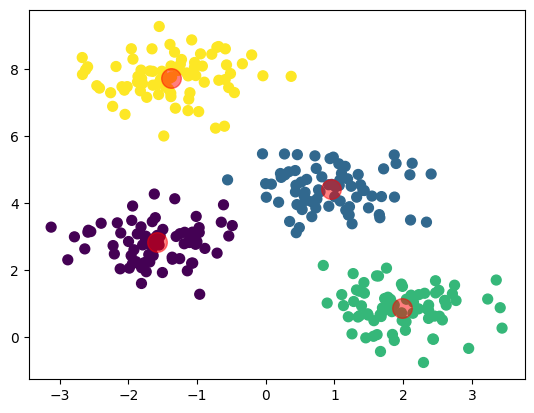

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a synthetic dataset
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Function to initialize centroids
def initialize_centroids(X, k):
    indices = np.random.permutation(X.shape[0])
    centroids = X[indices[:k]]
    return centroids

# Function to assign clusters
def assign_clusters(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

# Function to update centroids
def update_centroids(X, clusters, k):
    new_centroids = np.array([X[clusters==i].mean(axis=0) for i in range(k)])
    return new_centroids

# K-Means clustering
def k_means(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        old_centroids = centroids
        clusters = assign_clusters(X, centroids)
        centroids = update_centroids(X, clusters, k)
        if np.all(centroids == old_centroids):
            break
    return centroids, clusters

# Applying K-Means
k = 4  # number of clusters
centroids, clusters = k_means(X, k)

# Plotting the results
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', alpha=0.5)
plt.show()